In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [46]:
df = pd.read_csv('healthcare_dataset.csv')

Check the first 5 rows of the dataset and also to make sure if the dataset loaded properly.

In [47]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

Check if there is any null values

In [49]:
print(df.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


The countplot shows the distribution of different features in the dataset.

/tmp/ipython-input-2725491600.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


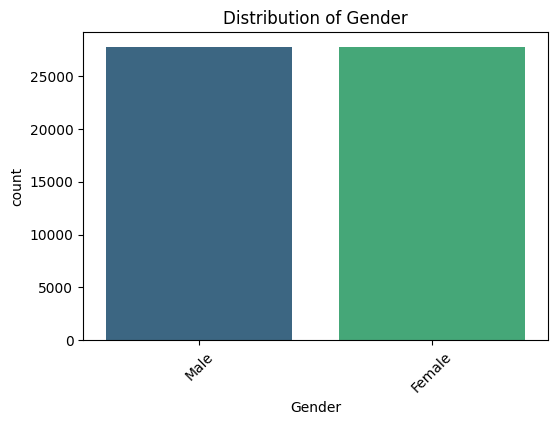

/tmp/ipython-input-2725491600.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


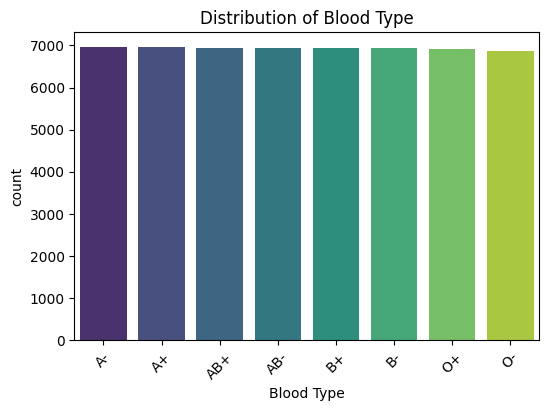

/tmp/ipython-input-2725491600.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


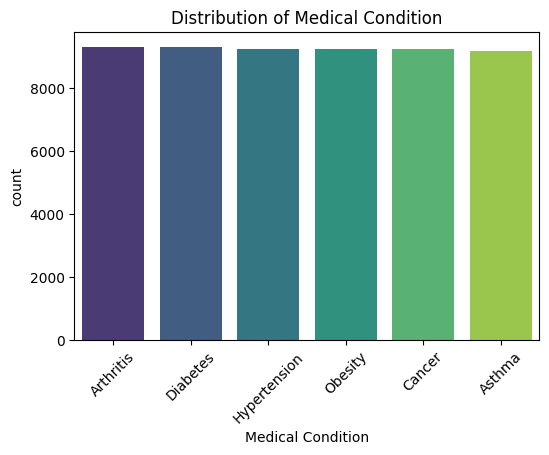

/tmp/ipython-input-2725491600.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


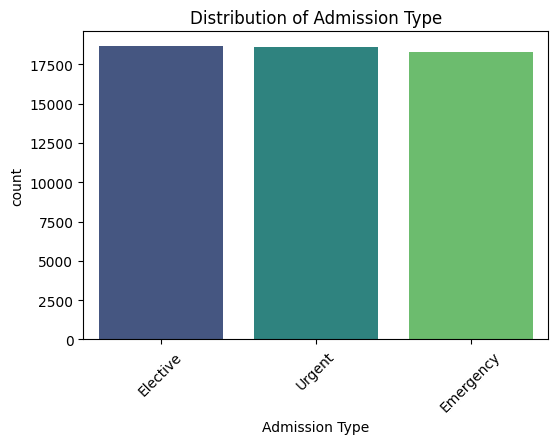

/tmp/ipython-input-2725491600.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


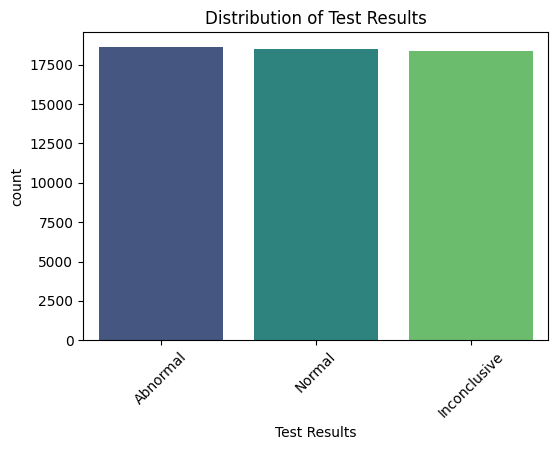

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Test Results']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

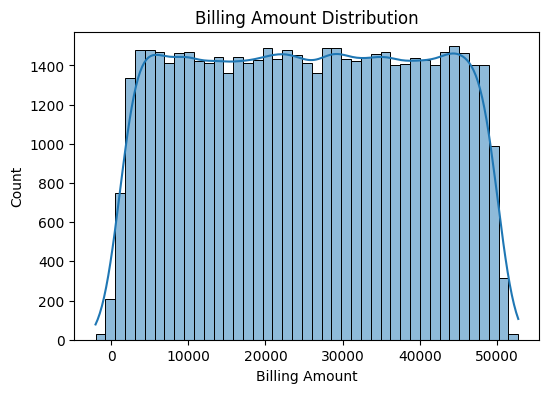

In [51]:
plt.figure(figsize=(6,4))
sns.histplot(df['Billing Amount'], kde=True)
plt.title("Billing Amount Distribution")
plt.show()

In [52]:
# Drop non-informative columns (like Name, Doctor, Room Number, Hospital)
drop_cols = ['Name', 'Doctor', 'Hospital', 'Room Number', 'Date of Admission', 'Discharge Date']
df = df.drop(columns=drop_cols)

In [53]:
df

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,Blue Cross,2650.714952,Elective,Penicillin,Abnormal
55496,61,Female,AB-,Obesity,Cigna,31457.797307,Elective,Aspirin,Normal
55497,38,Female,B+,Hypertension,UnitedHealthcare,27620.764717,Urgent,Ibuprofen,Abnormal
55498,43,Male,O-,Arthritis,Medicare,32451.092358,Elective,Ibuprofen,Abnormal


In [54]:
# This block prepares categorical data for machine learning.
# It converts all text columns into numerical labels using LabelEncoder.
# It stores each encoder in a dictionary for potential inverse transformation later.

label_encoders = {}  # Initialize an empty dictionary to store our encoders

# Loop through every column that has the 'object' (text) data type
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()  # Create a new LabelEncoder for the current column
    df[col] = le.fit_transform(df[col])  # Fit to the data and transform the column
    label_encoders[col] = le  # Store the fitted encoder in the dictionary

# Now all object columns in DataFrame 'df' have been converted to integers.
# The 'label_encoders' dict can be used to see the mapping or reverse the process.

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop('Test Results', axis=1)
y = df['Test Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)

SVC(C=10, random_state=42)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = svm_clf.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.3466666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.36      0.35      3754
           1       0.34      0.34      0.34      3617
           2       0.35      0.34      0.34      3729

    accuracy                           0.35     11100
   macro avg       0.35      0.35      0.35     11100
weighted avg       0.35      0.35      0.35     11100



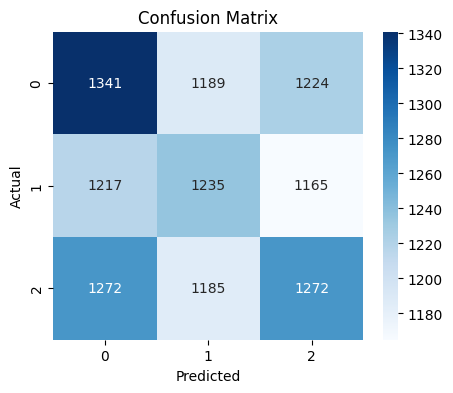

In [59]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [60]:
model_results = {}

Logistic Regression Accuracy: 0.3381
              precision    recall  f1-score   support

           0       0.35      0.34      0.34      3754
           1       0.33      0.32      0.32      3617
           2       0.34      0.36      0.35      3729

    accuracy                           0.34     11100
   macro avg       0.34      0.34      0.34     11100
weighted avg       0.34      0.34      0.34     11100



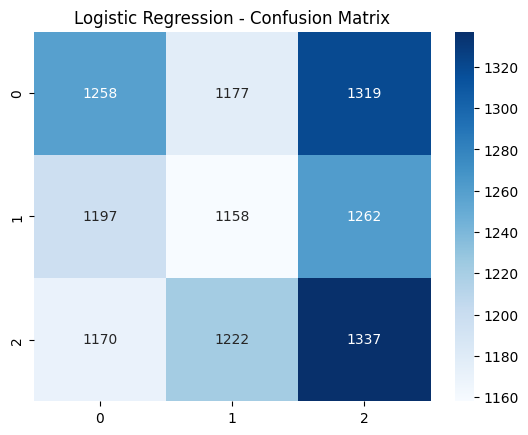

In [61]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
model_results["Logistic Regression"] = acc

print(f"Logistic Regression Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

Decision Tree Accuracy: 0.3948
              precision    recall  f1-score   support

           0       0.40      0.40      0.40      3754
           1       0.39      0.39      0.39      3617
           2       0.40      0.40      0.40      3729

    accuracy                           0.39     11100
   macro avg       0.39      0.39      0.39     11100
weighted avg       0.39      0.39      0.39     11100



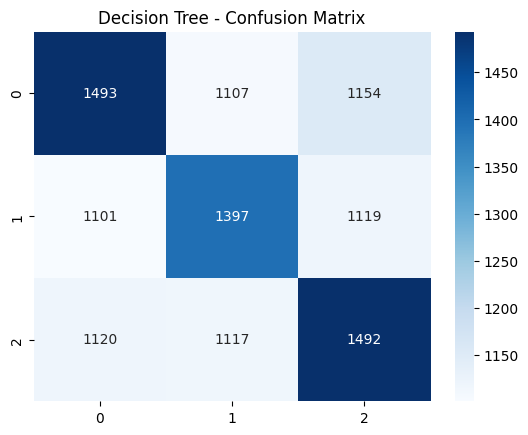

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
model_results["Decision Tree"] = acc

print(f"Decision Tree Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

Random Forest Accuracy: 0.4341
              precision    recall  f1-score   support

           0       0.43      0.44      0.43      3754
           1       0.43      0.43      0.43      3617
           2       0.44      0.43      0.44      3729

    accuracy                           0.43     11100
   macro avg       0.43      0.43      0.43     11100
weighted avg       0.43      0.43      0.43     11100



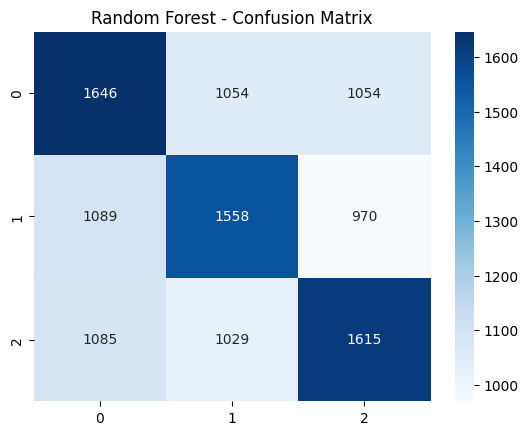

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
model_results["Random Forest"] = acc

print(f"Random Forest Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:41:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.3555
              precision    recall  f1-score   support

           0       0.35      0.36      0.36      3754
           1       0.36      0.36      0.36      3617
           2       0.36      0.34      0.35      3729

    accuracy                           0.36     11100
   macro avg       0.36      0.36      0.36     11100
weighted avg       0.36      0.36      0.36     11100



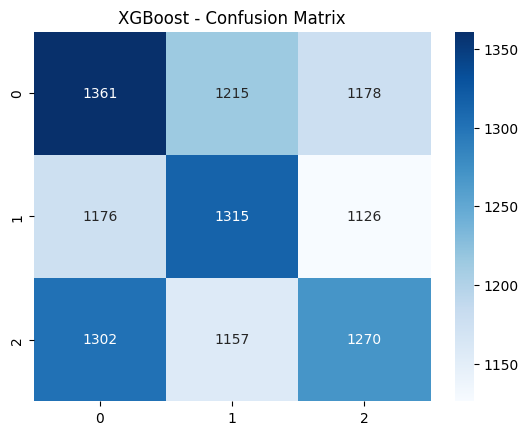

In [64]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
model_results["XGBoost"] = acc

print(f"XGBoost Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.show()

KNN Accuracy: 0.3671
              precision    recall  f1-score   support

           0       0.36      0.48      0.41      3754
           1       0.36      0.37      0.36      3617
           2       0.38      0.26      0.31      3729

    accuracy                           0.37     11100
   macro avg       0.37      0.37      0.36     11100
weighted avg       0.37      0.37      0.36     11100



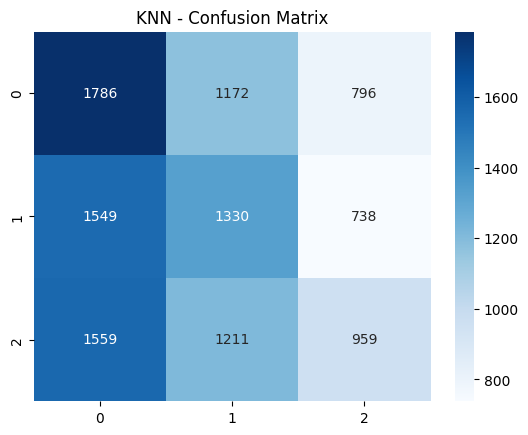

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
model_results["KNN"] = acc

print(f"KNN Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("KNN - Confusion Matrix")
plt.show()

SVM Accuracy: 0.3415
              precision    recall  f1-score   support

           0       0.34      0.37      0.35      3754
           1       0.34      0.34      0.34      3617
           2       0.35      0.32      0.33      3729

    accuracy                           0.34     11100
   macro avg       0.34      0.34      0.34     11100
weighted avg       0.34      0.34      0.34     11100



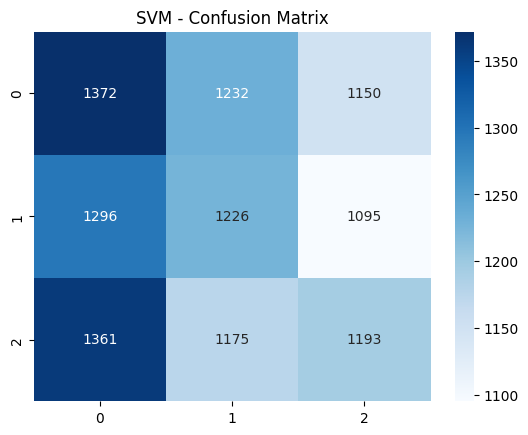

In [66]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
model_results["SVM"] = acc

print(f"SVM Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("SVM - Confusion Matrix")
plt.show()

/tmp/ipython-input-1552649153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette='mako')


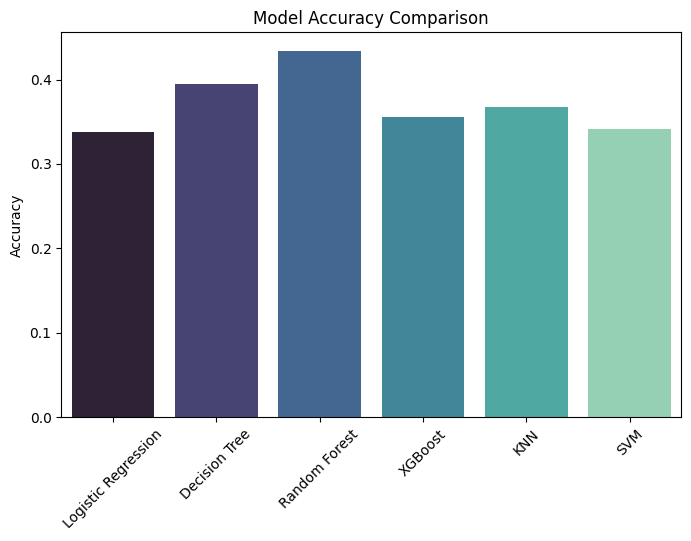


Accuracy Summary:
Logistic Regression: 0.3381
Decision Tree: 0.3948
Random Forest: 0.4341
XGBoost: 0.3555
KNN: 0.3671
SVM: 0.3415


In [67]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette='mako')
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

print("\nAccuracy Summary:")
for model, acc in model_results.items():
    print(f"{model}: {acc:.4f}")